In [1]:
# import some require libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Loan Application Status Prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# checking the null values in our data columns wise
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# we are checking null values by single columns wise of all the columns.
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [7]:
# There are some columns presented with NaN values in "str" or "char" format so firstly we are fill NaN values.
#from sklearn.preprocessing import Imputer

from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df     # most_frequent using for object/string data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
# filled all the nan value of frequent data.
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
# filled all the nan value of frequent data.
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df     # most_frequent using for object/string data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
# Here we are encode some data which is need to encode it
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()

In [12]:
# use LabelEncoder to convert the str or char data into int.
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Dependents']=le.fit_transform(df['Dependents'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [13]:
df['Dependents'].unique()

array([0, 1, 2, 3])

In [14]:
# There is no null values and data types are in either int64 or float64.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


<AxesSubplot:>

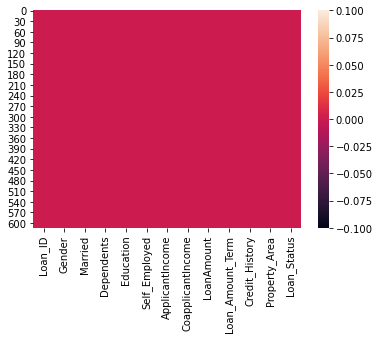

In [15]:
import seaborn as sns
sns.heatmap(df.isnull())

# EDA:

# ScatterPlot

<AxesSubplot:xlabel='Loan_ID', ylabel='Loan_Status'>

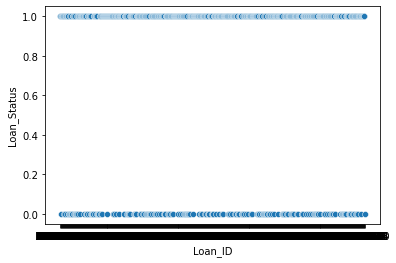

In [16]:
import seaborn as sns
sns.scatterplot(x='Loan_ID',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

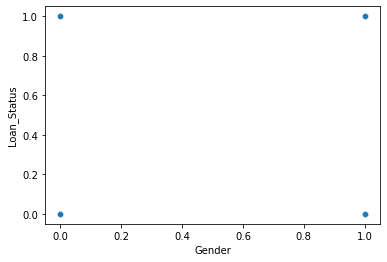

In [17]:
sns.scatterplot(x='Gender',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

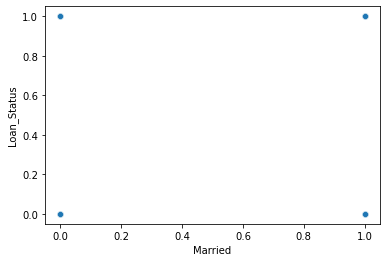

In [18]:
sns.scatterplot(x='Married',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

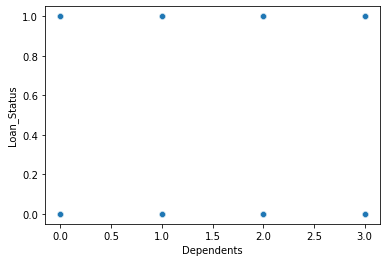

In [19]:
sns.scatterplot(x='Dependents',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

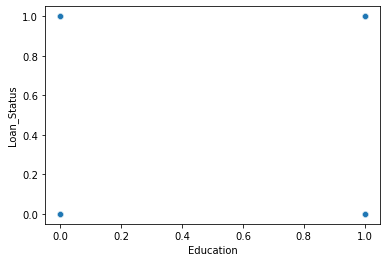

In [20]:
sns.scatterplot(x='Education',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

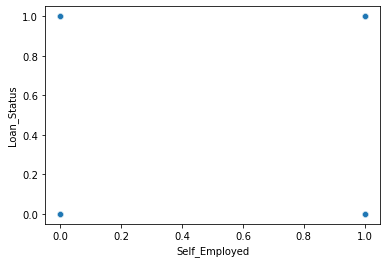

In [21]:
sns.scatterplot(x='Self_Employed',y='Loan_Status',data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

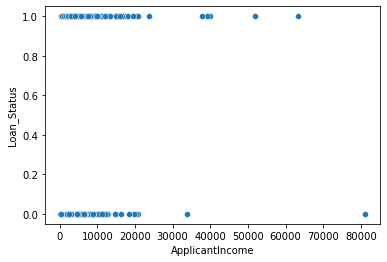

In [22]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=df)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

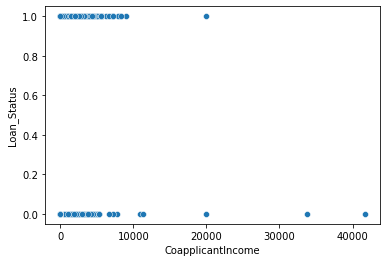

In [23]:
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

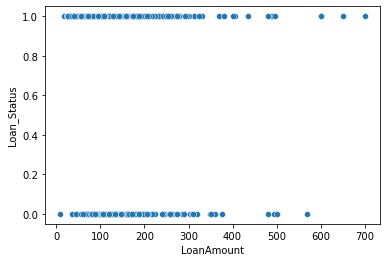

In [24]:
sns.scatterplot(x='LoanAmount',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

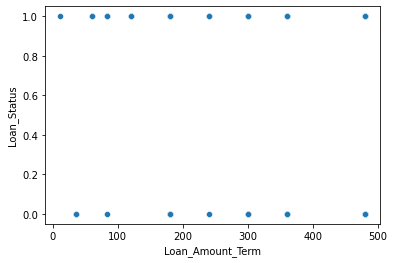

In [25]:
sns.scatterplot(x='Loan_Amount_Term',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

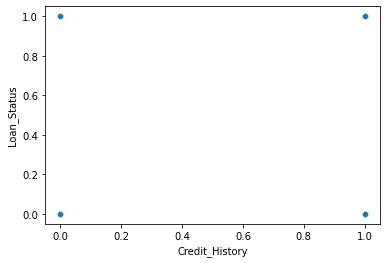

In [26]:
sns.scatterplot(x='Credit_History',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

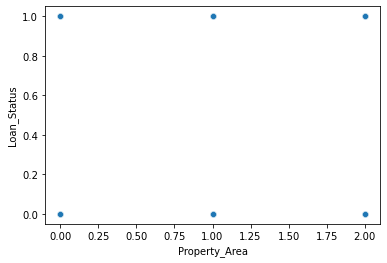

In [27]:
sns.scatterplot(x='Property_Area',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Status'>

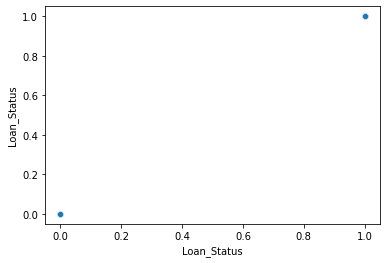

In [28]:
sns.scatterplot(x='Loan_Status',y='Loan_Status',data=df)

In [29]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


In [30]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

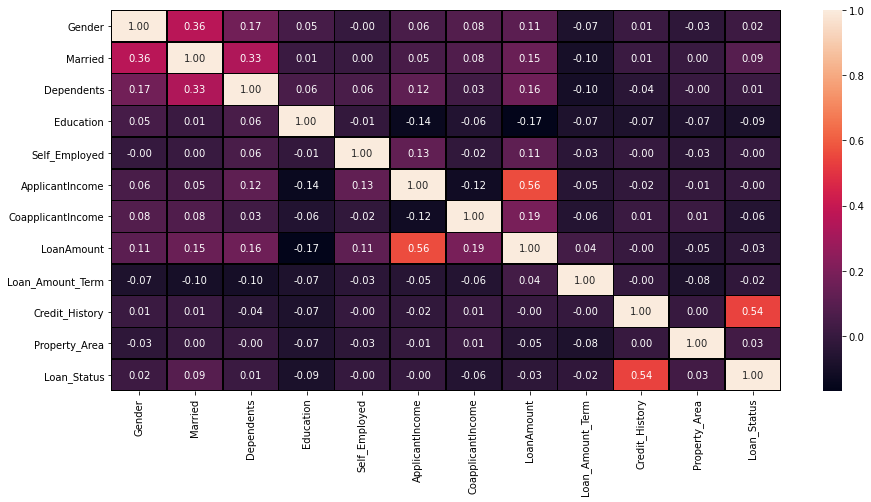

In [31]:
#Correlation using heatmap

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor="black", fmt='.2f')

In [32]:
#Describe Dataset
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


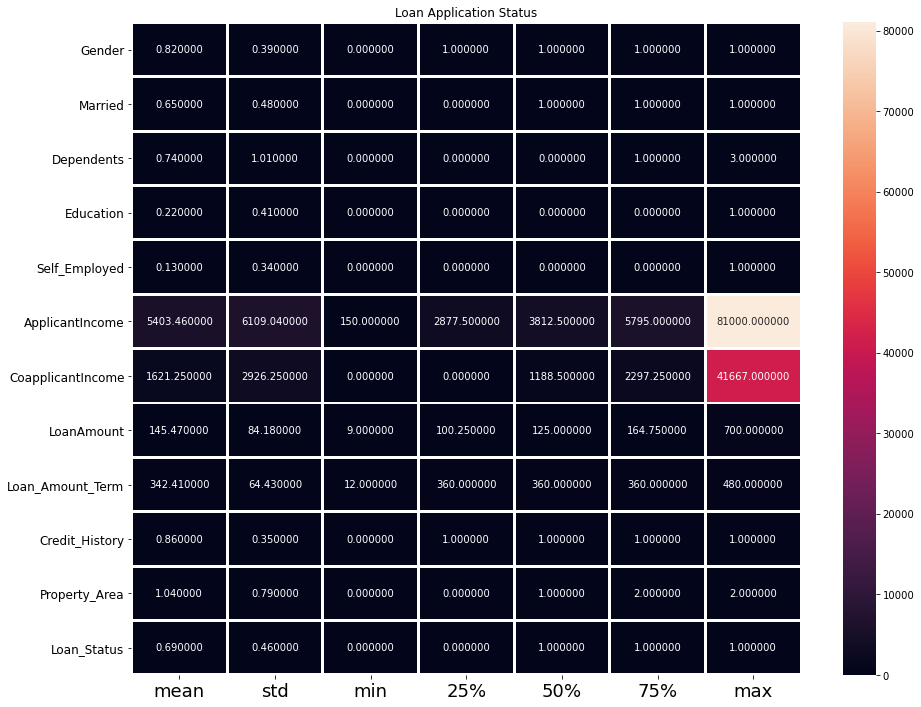

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Loan Application Status")
plt.show()

In [34]:
#To check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


<AxesSubplot:>

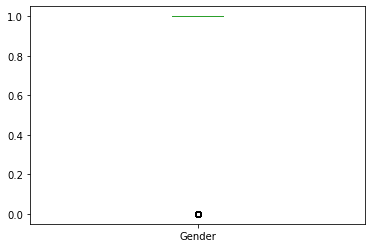

In [35]:
# we are checking outliers here.
df['Gender'].plot.box()

<AxesSubplot:>

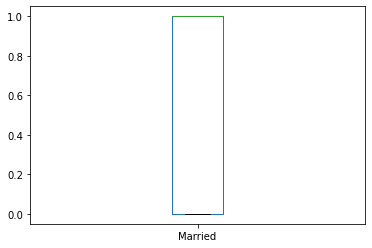

In [36]:
df['Married'].plot.box()

<AxesSubplot:>

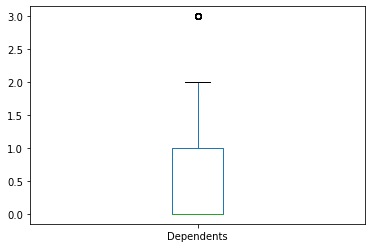

In [37]:
df['Dependents'].plot.box()

<AxesSubplot:>

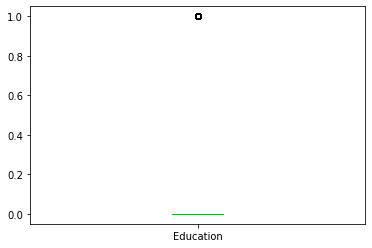

In [38]:
df['Education'].plot.box()

<AxesSubplot:>

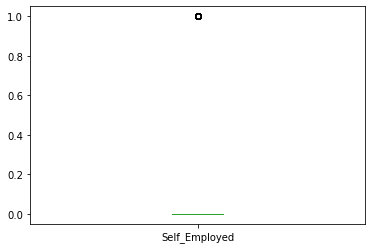

In [39]:
df['Self_Employed'].plot.box()

<AxesSubplot:>

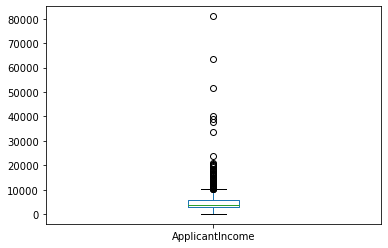

In [40]:
df['ApplicantIncome'].plot.box()

<AxesSubplot:>

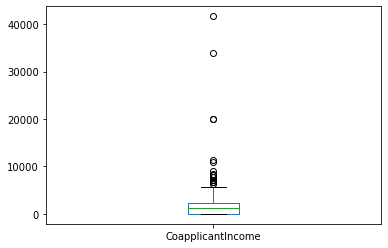

In [41]:
df['CoapplicantIncome'].plot.box()

<AxesSubplot:>

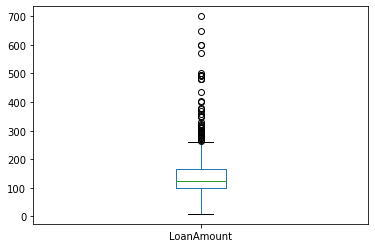

In [42]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

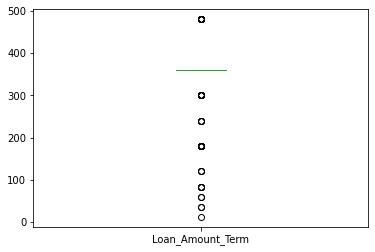

In [43]:
df['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

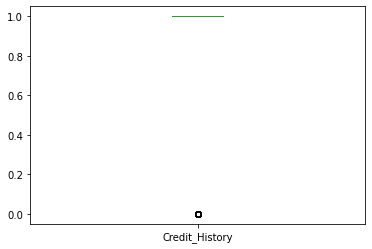

In [44]:
df['Credit_History'].plot.box()

<AxesSubplot:>

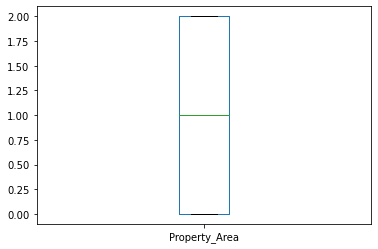

In [45]:
df['Property_Area'].plot.box()

<AxesSubplot:>

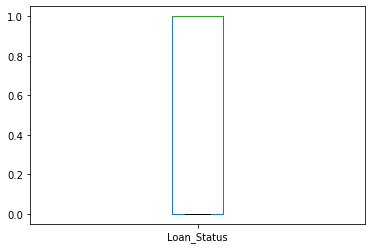

In [46]:
df['Loan_Status'].plot.box()

# Skewness:-

In [47]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Normal Distribution Curve

<AxesSubplot:xlabel='Gender', ylabel='Density'>

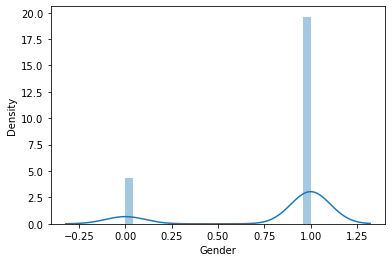

In [48]:
sns.distplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='Density'>

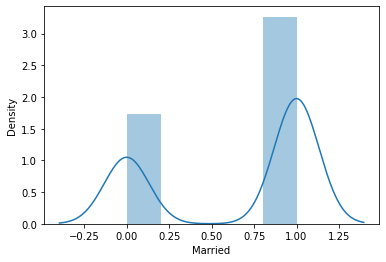

In [49]:
sns.distplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

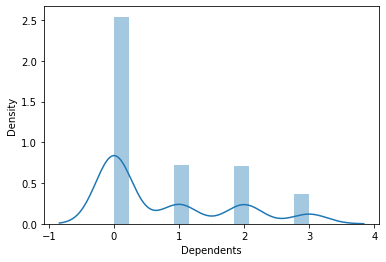

In [50]:
sns.distplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

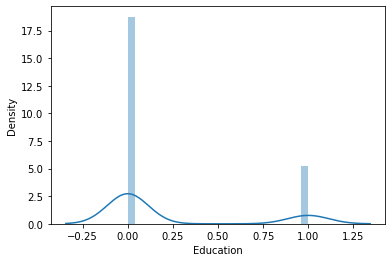

In [51]:
sns.distplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

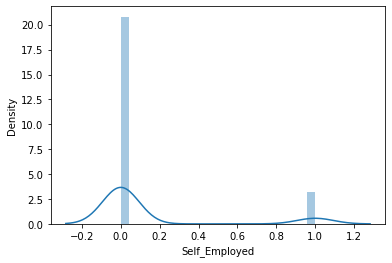

In [52]:
sns.distplot(df['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

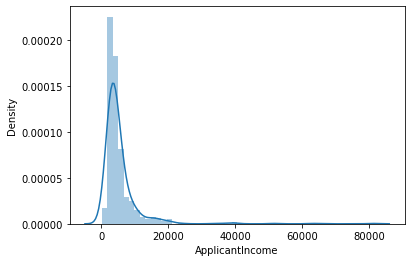

In [53]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

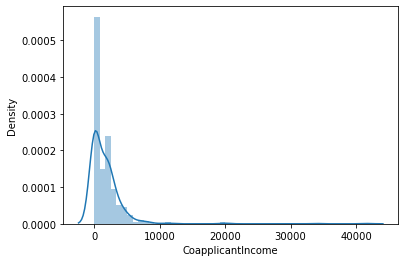

In [54]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

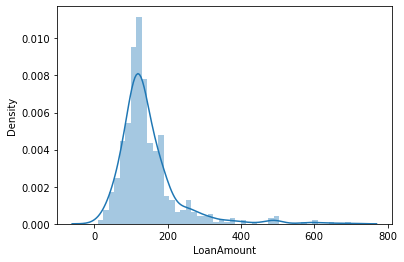

In [55]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

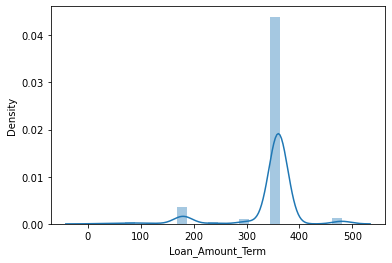

In [56]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

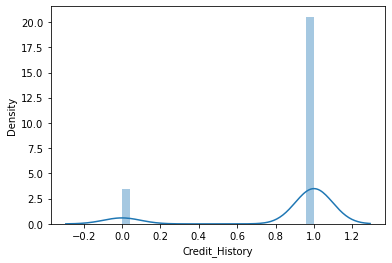

In [57]:
sns.distplot(df['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

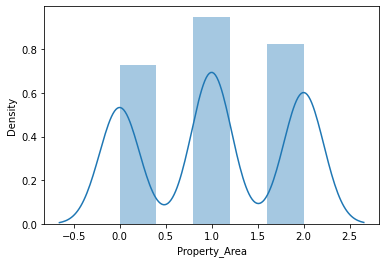

In [58]:
sns.distplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

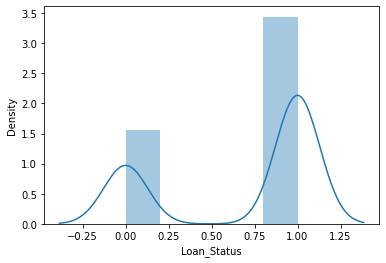

In [59]:
sns.distplot(df['Loan_Status'])

# The normal distribution shows that the data is skewed.

# Data Cleaning:

In [60]:
#*SP=skewed point.
SP = pd.DataFrame([["-0.003700","Self_Employed","No","Alot"],["-0.004710","ApplicantIncome","No","Alot"],["-0.022549","Loan_Amount_Term","No","Alot"],["-0.031808","LoanAmount","No","Alot"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])
SP

,Correlation with Target,Column Name,Normalised,Outliers
0,-0.003700,Self_Employed,No,Alot
1,-0.004710,ApplicantIncome,No,Alot
2,-0.022549,Loan_Amount_Term,No,Alot
3,-0.031808,LoanAmount,No,Alot


In [61]:
df1=df.drop(['Loan_ID'],axis=1)

In [62]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Removing Outliers:

# Z-Score Technique:

In [63]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))

In [64]:
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [65]:
df2=df1[(z<3).all(axis=1)]
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [66]:
# Here we can check shape both of the dataset.
df.shape,df2.shape

((614, 13), (577, 12))

# Percentage loss of data while removing ourliers

In [67]:
percentage_loss=((614-577)/614)*100
print(percentage_loss)

6.026058631921824


Since the percentage of outliers are less than 10 percent.

we can proceed with the outliers removable

In [68]:
x = df2[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df2['Loan_Status']

In [69]:
# Here we can check our seperation of our data in 2 variable x and y.
x.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0


In [70]:
y.head(2)

0    1
1    0
Name: Loan_Status, dtype: int32

# Transforming data to remove skewness

In [71]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464,  0.01546372]])

# Since the outcome has only two variable we will use binary classification model.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

# Splitting the dataframe:

In [74]:
# Here we are splitting our data in training and testing.
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", accuracy_score(y_test,pred_test)*100)
        print("\n")

At random state 41  The model performs very well
At random_state:- 41
Training r2_score is:- 81.77874186550976
Testing r2_score is:- 81.89655172413794


At random state 60  The model performs very well
At random_state:- 60
Training r2_score is:- 81.77874186550976
Testing r2_score is:- 81.89655172413794


At random state 63  The model performs very well
At random_state:- 63
Training r2_score is:- 81.77874186550976
Testing r2_score is:- 81.89655172413794


At random state 66  The model performs very well
At random_state:- 66
Training r2_score is:- 81.77874186550976
Testing r2_score is:- 81.89655172413794


At random state 69  The model performs very well
At random_state:- 69
Training r2_score is:- 81.77874186550976
Testing r2_score is:- 81.89655172413794


At random state 78  The model performs very well
At random_state:- 78
Training r2_score is:- 81.77874186550976
Testing r2_score is:- 81.89655172413794


At random state 104  The model performs very well
At random_state:- 104
Training r

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.svm import SVR


knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print('dtc score:',knr.score(x_train,y_train))

knrpredict = knr.predict(x_test)
print('dtc r2_score:', r2_score(y_test,knrpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,knrpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,knrpredict)))

dtc score: 0.4609846153846152
dtc r2_score: 0.11309334182860786
Mean squared error of dtc = 0.20689655172413793
Root Mean squared error of dtc = 0.454858826147342


In [84]:
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print('dtc score:',dtc.score(x_train,y_train))

dtcpredict = dtc.predict(x_test)
print('dtc r2_score:', r2_score(y_test,dtcpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,dtcpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,dtcpredict)))

dtc score: 1.0
dtc r2_score: -0.4042688754380377
Mean squared error of dtc = 0.3275862068965517
Root Mean squared error of dtc = 0.572351471472339


In [86]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
#RandomForestClassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(predrf)

print('Rf score:',rf.score(x_train,y_train))

print('rf r2_score:', r2_score(y_test,predrf))

[0.08 0.81 0.5  0.74 0.78 0.88 0.89 0.91 0.71 0.42 0.82 0.95 0.95 0.83
 0.86 0.92 0.74 0.69 0.65 0.79 0.97 0.91 0.83 0.86 0.98 0.9  0.72 0.47
 0.02 0.79 0.28 0.61 0.   0.74 0.75 0.87 0.88 0.89 0.9  0.89 0.79 0.9
 0.44 0.93 0.99 0.85 0.7  0.03 0.88 0.04 0.   0.95 0.91 0.72 0.95 0.91
 0.02 0.68 0.   0.26 0.79 0.71 0.81 0.55 0.26 0.   0.67 0.88 0.82 0.9
 0.97 0.   0.75 0.   0.63 0.01 0.85 0.07 0.75 0.9  0.59 0.48 0.97 0.75
 0.86 0.77 0.8  0.58 0.95 0.94 0.   0.9  0.81 0.75 0.77 0.97 0.5  0.
 0.64 0.82 0.92 0.81 0.86 0.66 0.62 0.66 0.72 0.75 0.76 0.98 0.94 0.89
 0.   0.84 0.87 0.96]
Rf score: 0.8974984230769231
rf r2_score: 0.2829285759796113


In [87]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50,random_state=42)

ada.fit(x_train,y_train)
predata=ada.predict(x_test)

print(predata)

print('Rf score: ',ada.score(x_train,y_train))
print('ADA r2_score:', r2_score(y_test,predata))

[0.09090909 0.8287037  0.8287037  0.8287037  0.8287037  0.69230769
 0.77272727 0.8287037  0.65217391 0.8287037  0.8287037  0.8287037
 0.8287037  0.8287037  0.8287037  0.8287037  0.8287037  0.65217391
 0.8287037  0.63636364 0.8287037  0.8287037  0.8287037  0.8287037
 0.8287037  0.63636364 0.8287037  0.63636364 0.05882353 0.8287037
 0.11111111 0.8287037  0.         0.69230769 0.77272727 0.8287037
 0.8287037  0.77272727 0.8287037  0.8287037  0.8287037  0.8287037
 0.8287037  0.65217391 0.8287037  0.8287037  0.8287037  0.05882353
 0.8287037  0.05882353 0.         0.65217391 0.8287037  0.63636364
 0.8287037  0.65217391 0.2        0.8287037  0.         0.22222222
 0.8287037  0.65217391 0.63636364 0.09090909 0.05882353 0.05882353
 0.8287037  0.8287037  0.65217391 0.63636364 0.8287037  0.
 0.8287037  0.         0.65217391 0.         0.8287037  0.09090909
 0.65217391 0.8287037  0.65217391 0.63636364 0.65217391 0.8287037
 0.63636364 0.63636364 0.63636364 0.8287037  0.65217391 0.8287037
 0.       

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
grid = GradientBoostingRegressor()

grid.fit(x_train,y_train)
predgrid=ada.predict(x_test)

print(predgrid)

print('Rf score: ',grid.score(x_train,y_train))

print('ADA r2_score:', r2_score(y_test,predgrid))

[0.09090909 0.8287037  0.8287037  0.8287037  0.8287037  0.69230769
 0.77272727 0.8287037  0.65217391 0.8287037  0.8287037  0.8287037
 0.8287037  0.8287037  0.8287037  0.8287037  0.8287037  0.65217391
 0.8287037  0.63636364 0.8287037  0.8287037  0.8287037  0.8287037
 0.8287037  0.63636364 0.8287037  0.63636364 0.05882353 0.8287037
 0.11111111 0.8287037  0.         0.69230769 0.77272727 0.8287037
 0.8287037  0.77272727 0.8287037  0.8287037  0.8287037  0.8287037
 0.8287037  0.65217391 0.8287037  0.8287037  0.8287037  0.05882353
 0.8287037  0.05882353 0.         0.65217391 0.8287037  0.63636364
 0.8287037  0.65217391 0.2        0.8287037  0.         0.22222222
 0.8287037  0.65217391 0.63636364 0.09090909 0.05882353 0.05882353
 0.8287037  0.8287037  0.65217391 0.63636364 0.8287037  0.
 0.8287037  0.         0.65217391 0.         0.8287037  0.09090909
 0.65217391 0.8287037  0.65217391 0.63636364 0.65217391 0.8287037
 0.63636364 0.63636364 0.63636364 0.8287037  0.65217391 0.8287037
 0.       

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=141)

In [90]:
# Here classification report is showing
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.26      0.17      0.20        30
           1       0.74      0.84      0.79        86

    accuracy                           0.66       116
   macro avg       0.50      0.50      0.50       116
weighted avg       0.62      0.66      0.64       116



# Cross validation score for logistic Regression:

In [91]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross Validation Score is:-",lsc*100 )
    print("Accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross Validation Score is:- 80.76400903498654
Accuracy_score is:- 82.75862068965517


At cv:- 3
Cross Validation Score is:- 81.45689407023605
Accuracy_score is:- 82.75862068965517


At cv:- 4
Cross Validation Score is:- 81.2823275862069
Accuracy_score is:- 82.75862068965517


At cv:- 5
Cross Validation Score is:- 81.98200899550224
Accuracy_score is:- 82.75862068965517


At cv:- 6
Cross Validation Score is:- 81.79947021764032
Accuracy_score is:- 82.75862068965517


At cv:- 7
Cross Validation Score is:- 81.64434742454138
Accuracy_score is:- 82.75862068965517


At cv:- 8
Cross Validation Score is:- 81.8017503805175
Accuracy_score is:- 82.75862068965517


At cv:- 9
Cross Validation Score is:- 81.80288461538461
Accuracy_score is:- 82.75862068965517




Here Cross-Validation score and Accuracy-score details are above.

Since cross validation score accuracy score are almost same. We are heading with a good approach

In [92]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ", lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.812823275862069 
The accuracy score is:  0.8275862068965517


# The Model with the outliers:

# AUC ROC Curve:

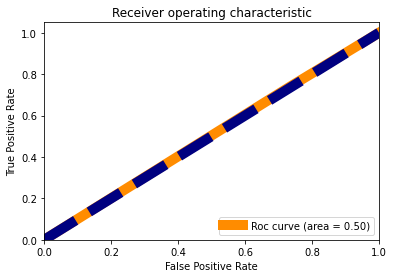

In [93]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=10, label='Roc curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy',lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Since the model without outliers performs well!! We will select that dataframe.

# Model Saving:

In [94]:
import pickle
filename = 'Loan Application Status Prediction'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion:

In [95]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
111,0,1
112,1,1
113,1,1
114,0,1
